# **DETECCION DE FRAUDE EN TRANSACCIONES CON  CC**     

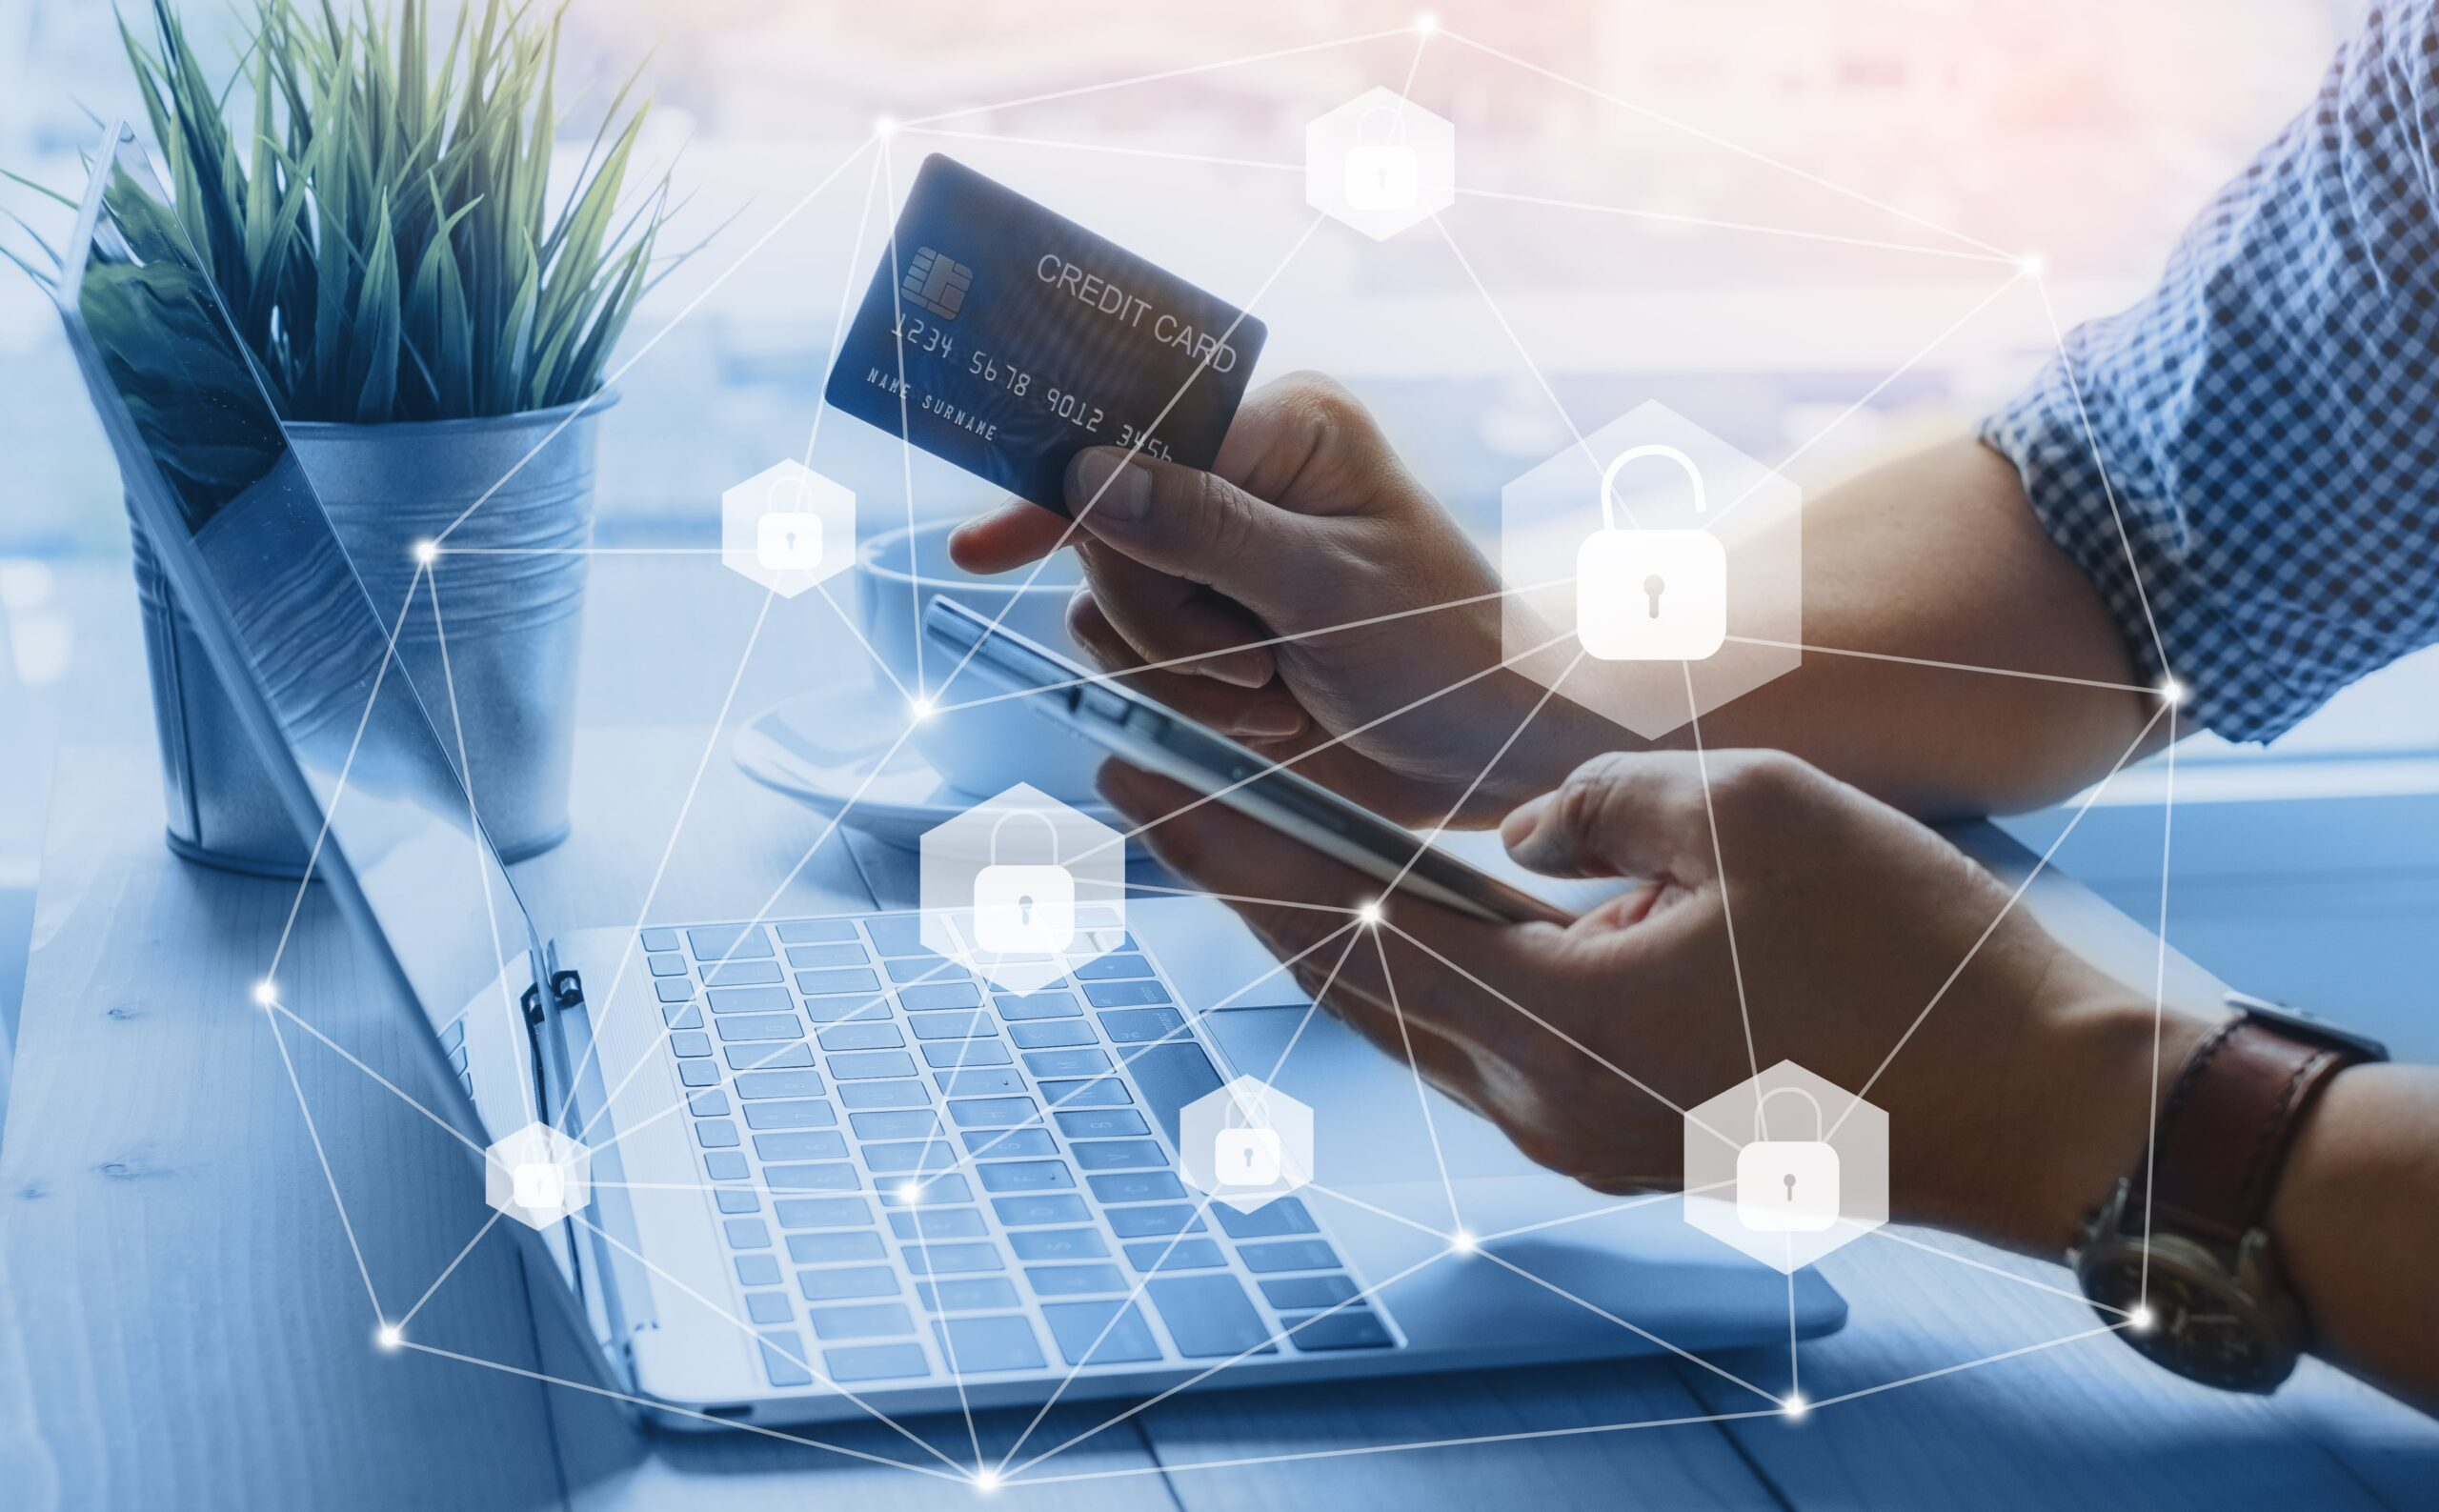
imagen(https://www.google.com/imgres?imgurl=https://daa1df3k0xsds.cloudfront.net/wp-content/uploads/2023/12/transacciones-electronicas-min-scaled.jpg&imgrefurl=https://www.camerfirma.com/seguridad-transacciones-electronicas/&h=1587&w=2560&tbnid=EzFf-EUPu8WzAM&source=sa.im&tbnh=177&tbnw=285&usg=AI4_-kSscmPqICp03eQLOTP88JfuvkV3ZA&vet=1&docid=m6jb3bXHj0V79M)

##                             **IS FRAUD? (variable predictora)**

**ABSTRACTO CON MOTIVACION Y AUDIENCIA**

La detección de fraude es un aspecto esencial de las transacciones con tarjetas de crédito. El impacto negativo es significativo tanto para las  instituciones financieras emisoras como para los clientes (titulares y comerciantes). Hace tiempo, el modo en que se podían evitar se hacía mediante revisiones manuales y periódicas totalmente ineficaces e inoportunas. Los tiempos han cambiado y nuestro objetivo es diseñar un modelo de Machine Learning que pueda predecir en forma satisfactoria estas transacciones de modo que se puedan generar alertas tempranas y evitar daños económicos a todas las partes.-

**PREGUNTAS DE INTERES / HIPOTESIS**

 *Hipótesis*: Las transacciones fraudulentas se efectúan por **única vez** con la misma tarjeta, ya que al ser detectadas por el sistema (comerciante, emisor)en forma rápida, no pueden volver a utilizarse.-

 *Preguntas*:
*   Es posible **detectar** estas tarjetas y denunciarlas a tiempo para no
    cometer futuras transacciones fraudulentas?
*   De todas las transacciones efectuadas cuántas son fraude?
*   Cuál es es porcentaje de fraude?
*   Cuál es la estadística de transacciones fraudulentas por tarjeta?
*   Se utilizaron varias veces el mismo día?
*   Son los montos relevantes en las transacciones fraudulentas?
*   Tiene alguna relaciòn relevante la edad de las personas que realizan los
    fraude?
*   Tiene relaciòn la cantidad poblaciòn de las ciudades con los titulares      
    de    tarjetas fraudulentas?
*   Se realizan màs transacciones fraudulentas durante los horarios **AM** o   
    **PM**?
*   Varían los comerciantes por cada tarjeta fraudulenta?
  
**ANALISIS EXPLORATORIO DE DATOS (EDA)**

Los datos a explorar provienen de un Dataset extraído de KAGGLE(), recopilados en EEUU periodo 01-01-2019 al 21-06-2020.- Esta base de datos contiene más de un millón de transacciones con distintos atributos los cuáles se analizarán para su limpieza, transformación,  selección, obtención de estadísticas y visualizaciones . Con un objetivo final: despliegue del modelo de ML.









## DATA SET ORIGINAL (Colab-Google Drive) "**transacciones_original**"

Comenzamos con el **dataset completo** el cual deberemos reducir porque no permite Github hostearlo alli por su tamaño.- Luego de reducirlo lo transformaremos a csv y lo hostearemos en Github.-

In [21]:
#Importamos librerias necesarias.
import matplotlib as mpl
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [22]:
#Establecemos el entorno de trabajo conectando a la base de datos que está en Google drive.
!gdown 1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh

Downloading...
From (original): https://drive.google.com/uc?id=1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh
From (redirected): https://drive.google.com/uc?id=1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh&confirm=t&uuid=911d986b-61f7-4353-97e9-4a62b2ada8e4
To: /content/Credit_Card_Transactions_DSII.csv
100% 354M/354M [00:09<00:00, 36.6MB/s]


In [23]:
#Leemos con pandas el dataset y comenzamos a analizarlo.
pd.read_csv("/content/Credit_Card_Transactions_DSII.csv")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [24]:
#Nombramos el dataset original y lo examinamos .
transacciones_original=pd.read_csv("Credit_Card_Transactions_DSII.csv")
transacciones_original.head(3)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0


In [25]:
#Solicitamos informacion del mismo (columnas, nulos, tipo de datos).
transacciones_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**PREGUNTA:**De cuántos estados de EEUU tenemos registro de transacciones con tarjetas de crédito?

**States** vs **Transacciones en Gral**.

In [26]:
#Estados únicos  en donde se realizaron transacciones del dataset original.Luego lo compararemos con Estados donde se producen fraudes.
numero_estados_unicos = transacciones_original["state"].nunique()
print(f"El número de estados únicos es: {numero_estados_unicos}")


El número de estados únicos es: 51


In [27]:
#Total de transacciones originales. Cantidad de columnas y filas del original.
transacciones_original.shape

(1296675, 24)

#DATA WRANGLING

## DATASET 1ER.PROCESAMIENTO. "**transacciones_long**"

In [28]:
#Dejamos el original intacto y continuamos con "long" que es una copia del mismo.-
transacciones_long=transacciones_original.copy()

In [29]:
#Borramos columnas innecesarias.
transacciones_long.drop(['street','last','first' ], axis=1, inplace=True)


In [30]:
#Eliminamos columna redundante.
transacciones_long.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
#Volvemos a observar dtype, duplicados, nulos y dataset en gral.
transacciones_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  trans_num         

In [32]:
#Seleccionamos estas columnas porque sospecho que tienen datos similares.
print(transacciones_long[["zip","merch_zipcode"]])

           zip  merch_zipcode
0        28654        28705.0
1        99160            NaN
2        83252        83236.0
3        59632            NaN
4        24433        22844.0
...        ...            ...
1296670  84735            NaN
1296671  21790        22630.0
1296672  88325        88351.0
1296673  57756        69367.0
1296674  59871        59870.0

[1296675 rows x 2 columns]


In [33]:
#Decidimos eliminar columna merch por contener información duplicada y  nulos.
transacciones_long.drop('merch_zipcode', axis=1, inplace=True)

In [34]:
#Traemos estas columnas para ver los datos que contienen.
print(transacciones_long[["trans_date_trans_time","trans_num","unix_time","merch_lat","merch_long","lat","long","is_fraud"]])

        trans_date_trans_time                         trans_num   unix_time  \
0         2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018   
1         2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044   
2         2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051   
3         2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076   
4         2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186   
...                       ...                               ...         ...   
1296670   2020-06-21 12:12:08  440b587732da4dc1a6395aba5fb41669  1371816728   
1296671   2020-06-21 12:12:19  278000d2e0d2277d1de2f890067dcc0a  1371816739   
1296672   2020-06-21 12:12:32  483f52fe67fabef353d552c1e662974c  1371816752   
1296673   2020-06-21 12:13:36  d667cdcbadaaed3da3f4020e83591c83  1371816816   
1296674   2020-06-21 12:13:37  8f7c8e4ab7f25875d753b422917c98c9  1371816817   

         merch_lat  merch_long      lat      long  

In [35]:
#Verificamos que lat, long  y "merch_lat","merch_long" contienen los  datos parecidos  y decidimos eliminarlas.
transacciones_long.drop(["merch_lat","merch_long"], axis=1, inplace=True)

In [36]:
#Vamos a cambiar tipo de dato de variable 'dob' a tipo fecha.
transacciones_long['dob'] = pd.to_datetime(transacciones_long['dob'])
transacciones_long['dob'].dtype
print(transacciones_long['dob'])

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1296670   1961-11-24
1296671   1979-12-11
1296672   1967-08-30
1296673   1980-08-18
1296674   1995-08-16
Name: dob, Length: 1296675, dtype: datetime64[ns]


In [37]:
#Vamos a cambiar tipo de dato de variable 'trans_date_trans_time' a tipo fecha.
transacciones_long["trans_date_trans_time"] = pd.to_datetime(transacciones_long["trans_date_trans_time"])
transacciones_long["trans_date_trans_time"].dtype
print(transacciones_long["trans_date_trans_time"])


0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: datetime64[ns]


In [38]:
#Vamos a crear columna trans_date  con función lambda para poder calcular la edad del titular de quien realiza la transacción, luego se eliminará
#antes de aplicar el modelo de ML.
transacciones_long['trans_date'] = transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).date())
print(transacciones_long['trans_date'])

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1296670    2020-06-21
1296671    2020-06-21
1296672    2020-06-21
1296673    2020-06-21
1296674    2020-06-21
Name: trans_date, Length: 1296675, dtype: object


In [39]:
#cambiamos el tipo de dato porque en la instrucción anterior no lo tomó.
transacciones_long['trans_date'] = pd.to_datetime(transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).date()))
transacciones_long['trans_date'].dtype
print(transacciones_long['trans_date'])

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1296670   2020-06-21
1296671   2020-06-21
1296672   2020-06-21
1296673   2020-06-21
1296674   2020-06-21
Name: trans_date, Length: 1296675, dtype: datetime64[ns]


In [40]:
# Obtenemos el período entre  la fecha mínima y máxima del data set.
fecha_minima = transacciones_long['trans_date'].min()
fecha_maxima = transacciones_long['trans_date'].max()

print(f'Rango de trans_date: {fecha_minima} a {fecha_maxima}')

Rango de trans_date: 2019-01-01 00:00:00 a 2020-06-21 00:00:00


In [41]:
#Vamos a crear columna   trans_time  con función lambda con la finalidad de determinar horarios AM PM.
transacciones_long['trans_time'] = transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).time())
print(transacciones_long['trans_time'])

0          00:00:18
1          00:00:44
2          00:00:51
3          00:01:16
4          00:03:06
             ...   
1296670    12:12:08
1296671    12:12:19
1296672    12:12:32
1296673    12:13:36
1296674    12:13:37
Name: trans_time, Length: 1296675, dtype: object


In [42]:
# Creamos la nueva columna 'AM_PM', luego para el modelo los transformaremos en 0(AM), 1(PM).
transacciones_long['AM_PM'] = transacciones_long['trans_time'].apply(lambda x: 'AM' if x.hour < 12 else 'PM')
print(transacciones_long[['trans_time', 'AM_PM']])

        trans_time AM_PM
0         00:00:18    AM
1         00:00:44    AM
2         00:00:51    AM
3         00:01:16    AM
4         00:03:06    AM
...            ...   ...
1296670   12:12:08    PM
1296671   12:12:19    PM
1296672   12:12:32    PM
1296673   12:13:36    PM
1296674   12:13:37    PM

[1296675 rows x 2 columns]


In [43]:
#Eliminamos la columna trans_time porque no la utilizaremos.
transacciones_long.drop('trans_time', axis=1, inplace=True)

In [44]:
# Creamos  la columna 'age' y efectuamos el cálculo de los años de quien efectúa la transacción.
transacciones_long['age'] = transacciones_long.apply(lambda row: row['trans_date'].year - row['dob'].year - ((row['trans_date'].month, row['trans_date'].day) <
(row['dob'].month, row['dob'].day)), axis=1)
print(transacciones_long[['dob', 'trans_date', 'age']])

               dob trans_date  age
0       1988-03-09 2019-01-01   30
1       1978-06-21 2019-01-01   40
2       1962-01-19 2019-01-01   56
3       1967-01-12 2019-01-01   51
4       1986-03-28 2019-01-01   32
...            ...        ...  ...
1296670 1961-11-24 2020-06-21   58
1296671 1979-12-11 2020-06-21   40
1296672 1967-08-30 2020-06-21   52
1296673 1980-08-18 2020-06-21   39
1296674 1995-08-16 2020-06-21   24

[1296675 rows x 3 columns]


In [45]:
#Nos queda un dataset con una 1ra.depuración.
transacciones_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   city                   1296675 non-null  object        
 7   state                  1296675 non-null  object        
 8   zip                    1296675 non-null  int64         
 9   lat                    1296675 non-null  float64       
 10  long                   1296675 non-null  float64       
 11  city_pop               1296675 non-null  int64         
 12  job                    12966

# ANALISIS EXPLORATORIO DE DATOS - EDA (Exploratory Data Analysis).

In [46]:
#Elegimos un estilo  para las visualizaciones con matplotlib.
mpl.style.use('seaborn')

<ipython-input-46-e3a897972a5f>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [47]:
#Combinamos con este estilo en seaborn.
sns.set_style("white")

## SUB-DATAFRAME (basados **Fraude si/no**)

**PREGUNTA**:De todas las transacciones efectuadas cuántas son fraude?

In [48]:
#Establecemos el conteo de la variable predictora "is fraud".
transacciones_totales_conteo= transacciones_long['is_fraud'].value_counts()
transacciones_totales_conteo

,count
is_fraud,
0,1289169
1,7506


**RTA.**:Del 1.289.169 de transacciones totales, **7506** son **fraude**.

**PREGUNTA:**Cuál es es porcentaje de fraude?

---



In [49]:
#Establecemos el procentaje.
transacciones_totales_porcentaje = transacciones_long['is_fraud'].value_counts(normalize=True) * 100
transacciones_totales_porcentaje

,proportion
is_fraud,
0,99.421135
1,0.578865


**RTA.**en gráfico

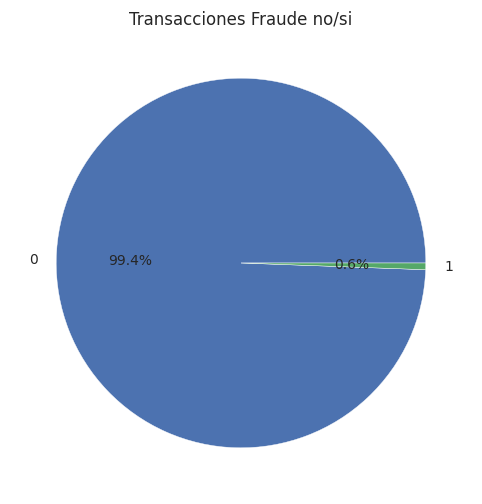

In [50]:
#Se crea este gráfico para comprender las dimensiones de fraude no (0), fraude si (1).
plt.figure(figsize=(10, 6))
plt.pie(transacciones_totales_conteo, labels=transacciones_totales_conteo.index, autopct='%1.1f%%')
plt.title('Transacciones Fraude no/si')
plt.show()



Al tratarse de una relación tan desproporcionada, vamos a trabajar principalmente sobre el análisis de los fraudes si (0.6%) y obtener insigths sobre este grupo en particular.

In [51]:
#Totales y Porcentajes juntos .
df_totales_conteo_porcentaje  = pd.DataFrame({'Conteo': transacciones_totales_conteo, 'Porcentaje': transacciones_totales_porcentaje})
df_totales_conteo_porcentaje = df_totales_conteo_porcentaje.round(2)
print(df_totales_conteo_porcentaje )

           Conteo  Porcentaje
is_fraud                     
0         1289169       99.42
1            7506        0.58


**PREGUNTA**:Hay transacciones duplicadas en el dataset?

In [52]:
#Determinamos las transacciones únicas eliminando duplicados, utilizando la columna 'trans_num'.
transacciones_unicas = transacciones_long.drop_duplicates(subset=['trans_num'])
transacciones_unicas.shape

(1296675, 20)

**RTA**.:Determinamos que **no hay** transacciones **duplicadas**.

In [53]:
#Eliminamos unix_time al conocer que no existen transacciones duplicadas.
transacciones_long.drop('unix_time', axis=1, inplace=True)


## SUB-DATAFRAME (basados exclusivamente en **Fraude si**)

In [54]:
#Elegimos solo los datos que corresponden a fraude si.
transacciones_fraude=transacciones_long[transacciones_long['is_fraud'] == 1]
transacciones_fraude.shape


(7506, 19)

Corroboramos el mismo nro.de transacciones fraude que con el conteo.

**PREGUNTA**:Cuántas tarjetas únicas hay?

In [55]:
#Contamos las tarjetas únicas.
cantidad_tarjetas_unicas = transacciones_fraude['cc_num'].nunique()
print(f"Cantidad de tarjetas únicas: {cantidad_tarjetas_unicas}")

Cantidad de tarjetas únicas: 762


In [56]:
# Agrupamos por numero de tarjeta 'cc_num', contamos  las transacciones y lo transformamos en un dataframe.-
conteo_fraude_cc= transacciones_fraude.groupby('cc_num').size().reset_index(name='fraude_count')
print(conteo_fraude_cc)


                  cc_num  fraude_count
0            60416207185             9
1            60422928733            12
2            60423098130            10
3            60427851591            14
4            60490596305            10
..                   ...           ...
757  4911818930706644725             9
758  4956828990005111019            10
759  4973530368125489546            10
760  4980323467523543940            10
761  4992346398065154184             8

[762 rows x 2 columns]


In [57]:
#Obtenemos datos estadísticos sobre tarjetas únicas.
conteo_fraude_cc['fraude_count'].describe()

,fraude_count
count,762.000000
mean,9.850394
std,2.961191
min,2.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,19.000000


**PREGUNTA**:Qué relación hay entre transacciones fraude y la cantidad de tarjetas utilizadas?

**RTA.:**Se cometen **7506** transacciones fraudulentas con **762** tarjetas únicas.

**PREGUNTA**:Cuál es la estadística de transacciones fraudulentas por tarjeta?

**RTA.:**El mínimo de transacciones por tarjeta es 2 veces, el promedio es 9.8 veces, el máximo es 19 veces  con la misma tarjeta.- Si tomamos los cuartiles un 25% de las transacciones usaron la misma tarjeta 8 veces, un 50% la uso 10 veces y un 75% la usó 12 veces.-

A modo representativo nos interesa ver el funcionamiento de aquellas tarjetas que se utilizaron alebozamente **más de 16 veces**.


In [58]:
#Identificamos las tarjetas con fraude_count mayor a 16 veces.
fraude_mayor_16 = conteo_fraude_cc[conteo_fraude_cc['fraude_count'] > 16]
print(fraude_mayor_16)

               cc_num  fraude_count
73      4260128500325            18
89      4593569795412            19
364  3520550088202337            19


In [59]:
# Obtener los datos de transacciones_long para tarjetas con fraude mayor a 16 veces.
transacciones_fraude_mayor_16 = transacciones_long[transacciones_long['cc_num'].isin(fraude_mayor_16['cc_num'])]
transacciones_fraude_mayor_16


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,is_fraud,trans_date,AM_PM,age
1054,2019-01-01 13:07:25,3520550088202337,fraud_Heathcote LLC,shopping_net,106.70,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,c091df34fe7eddc0b419e6374d8aea66,0,2019-01-01,PM,17
1086,2019-01-01 13:25:36,3520550088202337,fraud_Botsford PLC,home,30.29,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,92d0c4c28e76c15ac69d1702620db6ba,0,2019-01-01,PM,17
2310,2019-01-01 23:08:04,3520550088202337,fraud_Koepp-Parker,grocery_pos,50.26,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,5e32483d6168df11d5644e1dcc627b4c,0,2019-01-01,PM,17
2676,2019-01-02 07:03:39,4260128500325,"fraud_Olson, Becker and Koch",gas_transport,50.25,F,Deane,KY,41812,37.2409,-82.7696,230,"Conservation officer, historic buildings",1997-08-04,45698034e1476bda5ae85ae7b1e50c66,0,2019-01-02,AM,21
5182,2019-01-04 09:09:47,3520550088202337,fraud_Spinka-Welch,grocery_net,37.68,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,ecf3feab95507ec36b0f8db219e242ba,0,2019-01-04,AM,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295376,2020-06-21 00:45:40,3520550088202337,"fraud_Greenholt, Jacobi and Gleason",gas_transport,89.36,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,f566eea539baf2ba55e85130df5f081e,0,2020-06-21,AM,18
1295695,2020-06-21 03:43:49,3520550088202337,fraud_Torp-Labadie,gas_transport,85.51,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,95c48f1b86b2d535f0040ef7d7377bc5,0,2020-06-21,AM,18
1296425,2020-06-21 09:58:03,4260128500325,fraud_Wuckert-Walter,grocery_net,9.40,F,Deane,KY,41812,37.2409,-82.7696,230,"Conservation officer, historic buildings",1997-08-04,10726612dca8bd5a032d0d46dd5398ae,0,2020-06-21,AM,22
1296460,2020-06-21 10:19:37,3520550088202337,"fraud_Raynor, Reinger and Hagenes",gas_transport,46.02,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,a0aae29b0ed0b680214b5b8340284fe7,0,2020-06-21,AM,18


**PREGUNTA**: Se utilizaron varias veces el mismo día?

**RTA**.:Observamos que en esta muestra, las dos tarjetas que aparecen se usaron el mismo día varias veces y además se **volvieron a utilizar** **6 meses después**. Increíble**!**

**Tarjeta** vs **Date**

In [60]:
#Analizamos por nro.de tarjeta las cantidades, fechas y horas  de las transacciones fraude.
transacciones_fraude_date = transacciones_fraude.groupby(['cc_num','trans_date_trans_time'])
transacciones_fraude_date['trans_num'].count()

cc_num               trans_date_trans_time
60416207185          2019-03-01 01:32:53      1
                     2019-03-01 02:42:25      1
                     2019-03-01 23:06:58      1
                     2019-03-02 22:10:38      1
                     2019-03-02 22:10:59      1
                                             ..
4992346398065154184  2019-10-31 23:55:45      1
                     2019-11-01 02:40:44      1
                     2019-11-01 14:55:10      1
                     2019-11-01 22:08:45      1
                     2019-11-01 22:23:48      1
Name: trans_num, Length: 7506, dtype: int64

Observamos la variacion de los **días** y **horas**,  lo cual nos indica que  utilizar algún instrumento rápido de bloqueo de   tarjetas sería óptimo para  evitar que se sigan haciendo transacciones con otros comerciantes. Para ello, el modelo de predicción.

Se advierte que el mecanismo es realizar varias transacciones el mismo día y al día siguiente también, usando  la misma tarjeta fraudulenta lo que nos hace valorar aun más un modelo que prediga en forma rápida  la predicción de fraude.
También observamos que al no ser detectadas algunas, vuelven a utilizarse meses despúes.-


Generamos un dataframe  con estadísticas sobre los **montos** de las transacciones con tarjetas únicas.

**Tarjetas** vs **Montos**

In [61]:
#Agrupamos por nro tarjeta, montos de transacciones y calculamos estadísticas.
agrupados_montos=transacciones_fraude.groupby(['cc_num'])['amt'].aggregate(['min', 'mean', 'max'])
agrupados_montos

,min,mean,max
cc_num,,,
60416207185,11.74,211.081111,830.06
60422928733,7.13,625.015000,1036.43
60423098130,5.21,459.808000,1222.17
60427851591,8.86,688.985000,1164.36
60490596305,17.17,599.547000,1073.82
...,...,...,...
4911818930706644725,10.46,535.275556,951.95
4956828990005111019,11.39,659.949000,1051.26
4973530368125489546,12.84,537.107000,1018.47


**PREGUNTA**: Son los montos relevantes en las transacciones fraudulentas?

In [62]:
# Calculamos los promedios de los valores estadísticos de montos con tarjetas únicas.
promedio_mean = agrupados_montos['mean'].mean()
promedio_max = agrupados_montos['max'].mean()
maximo_de_los_maximos = agrupados_montos['max'].max()
print(f'Promedio de las medias: {promedio_mean}')
print(f'Promedio de los máximos: {promedio_max}')
print(f'Máximo de los máximos: {maximo_de_los_maximos}')




Promedio de las medias: 527.5796537147179
Promedio de los máximos: 1027.6041994750656
Máximo de los máximos: 1376.04


**RTA**.: Observamos en la muestra que hay un  **monto** mínimo  con valor de  5 dol al parecer **irrelevantes no??**. El promedio de los promedios por tarjeta son  527 dol y el valor máximo de los máximos por tarjetas es  1376 dol.-

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

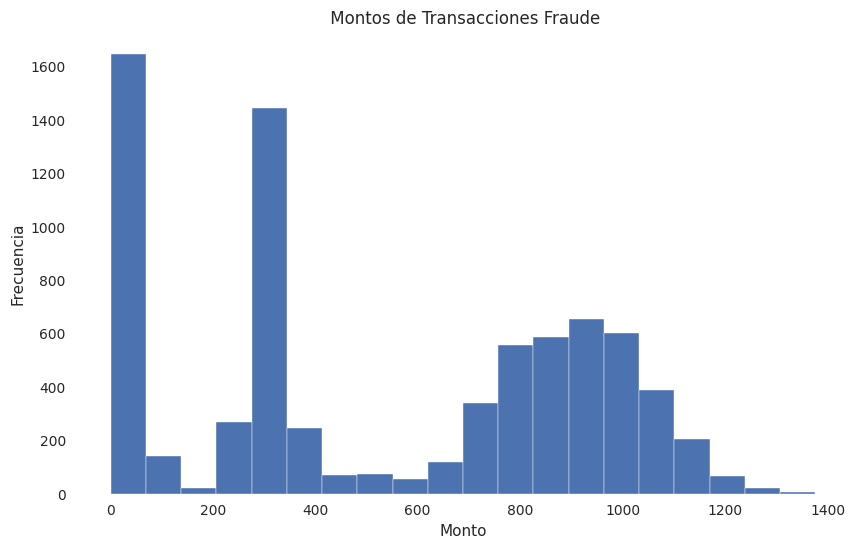

In [63]:
#Analizamos la variable "monto".
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['amt'], bins=20)
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title(' Montos de Transacciones Fraude')
plt

**PREGUNTA**: Qué nos indica el histograma? Qué nos sugieren estas distribuciones?

**RTA**.: 1) Observamos un pico Inicial < 50 dolares, que por su alta frecuencia de transacciones  podría sugerir micro-transacciones frecuentes,  para evitar su detección.

2) Observamos un 2do.pico en 300 dolares, podría apuntar a montos medianos que son lo suficientemente valiosos si los multiplicamos por la cantidad de transacciones (300*1500= 450000 dolares, pero no tan altos como para levantar sospechas.

3)Por último una distribución normal entre 600 y 1400 dólares representando transacciones más típicas que intentan pasar desapercibidas en un rango monetario amplio.

<Axes: xlabel='amt'>

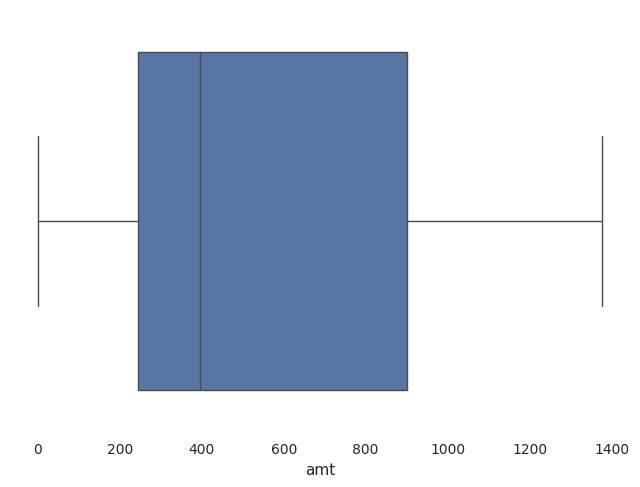

In [64]:
sns.boxplot(transacciones_fraude,x='amt')

En este gràfico observamos que no hay valores outliers y que el valor mas repetido es 400. Un 25% de transacciones con montos muy bajos menores a 100 dolares, se puede tambièn visualizar en el histograma. un 50% de los montos entre 250 y 900 dolares y otro 25% con montos entre 1000 y 1400 dolares.-

In [65]:
import warnings
# Ocultar las advertencias
warnings.filterwarnings('ignore')

Comenamos a analizar las edades pero empezamos con el dataset que contiene **fraude y no fraude**, para tener conocimiento del tipo de variable.

Text(0.5, 1.0, 'Distribución de Edades')

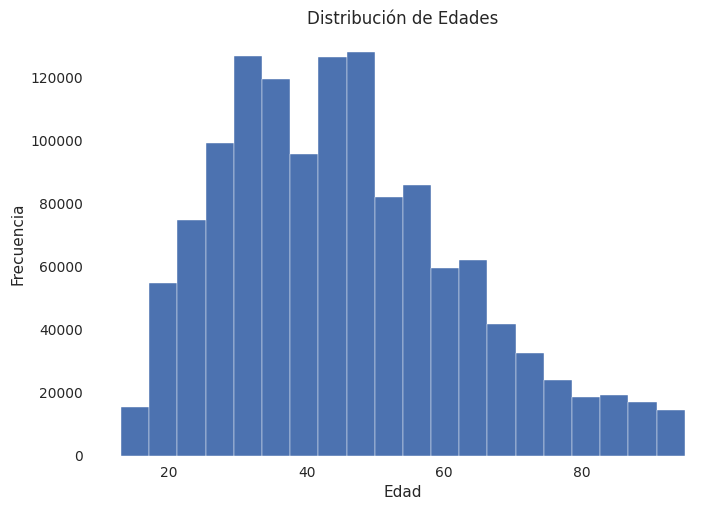

In [66]:
#La variable tiene una distribuciòn normal.
plt.hist(transacciones_long['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')

La variable edad en el dataset inicial con transacciones fraudes/no fraude  tiene una distribuciòn de frecuencia normal.-

Continuamos con las edades de **FRAUDE SI**.

**Transacciones Fraude **vs **Edad**

Text(0.5, 1.0, 'Edades de Titulares de Tarjetas Fraude')

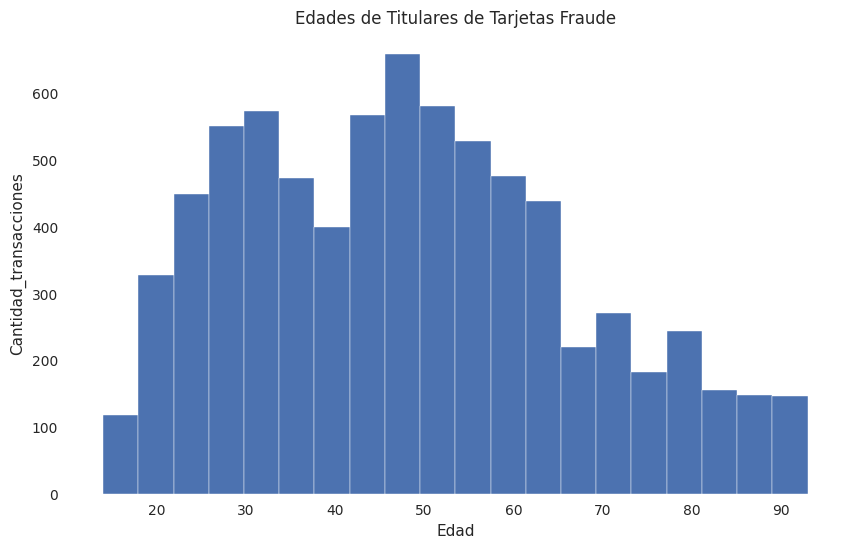

In [67]:
#Analizamos con histograma la variable edad.
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Cantidad_transacciones')
plt.title('Edades de Titulares de Tarjetas Fraude')


**PREGUNTA**: Tiene alguna relaciòn relevante la edad de las personas que realizan los fraude?

<Axes: xlabel='age'>

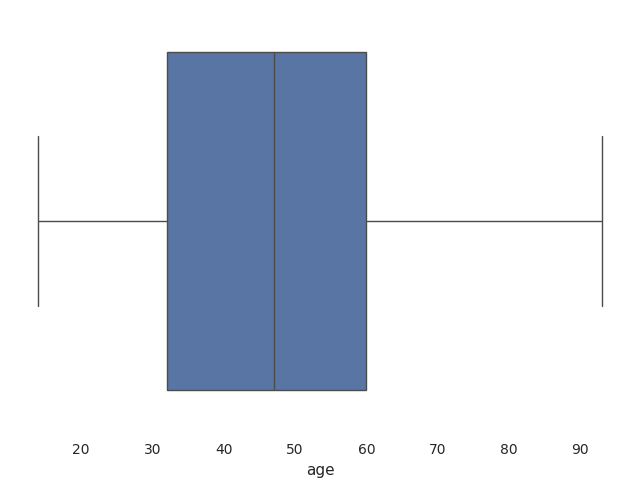

In [68]:
#Anàlisis univariado de la edad de titulares de tarjetas fraudulentas.
sns.boxplot(transacciones_fraude,x='age')


**RTA**: Un 25% de los titulares tienen menos de 32 años, entre ellos una cantidad menor(120) con 14 años. Asismismo un 25% de titulares con edades de màs de 60 años, entre ellos titulares con edades muy avanzadas como los son mayores de 80 y 90 años es llamativo .- El 50% de titulares con edades entre 30 y 60 años.-

In [73]:
# Obtener estadísticas de edades
age_estadistica = transacciones_fraude.groupby('cc_num')['age'].aggregate(['min', 'mean', 'max']).reset_index()
# Creamos un DataFrame para age_fraude_cc
age_fraude_cc = pd.DataFrame( )

# Asignar las estadísticas al DataFrame age_fraude_cc
age_fraude_cc['min_age'] = age_estadistica['min']
age_fraude_cc['mean_age'] = age_estadistica['mean']
age_fraude_cc['max_age'] = age_estadistica['max']
age_fraude_cc.describe()

,min_age,mean_age,max_age
count,762.000000,762.000000,762.000000
mean,48.960630,48.963426,48.965879
std,18.690818,18.691453,18.691742
min,14.000000,14.000000,14.000000
25%,34.000000,34.000000,34.000000
50%,48.000000,48.000000,48.000000
75%,61.750000,61.750000,61.750000
max,93.000000,93.000000,93.000000


      age      age_group
2449   30  menores de 80
2472   58  menores de 80
2523   58  menores de 80
2546   30  menores de 80
2553   58  menores de 80


Text(0.5, 0, 'Edades')

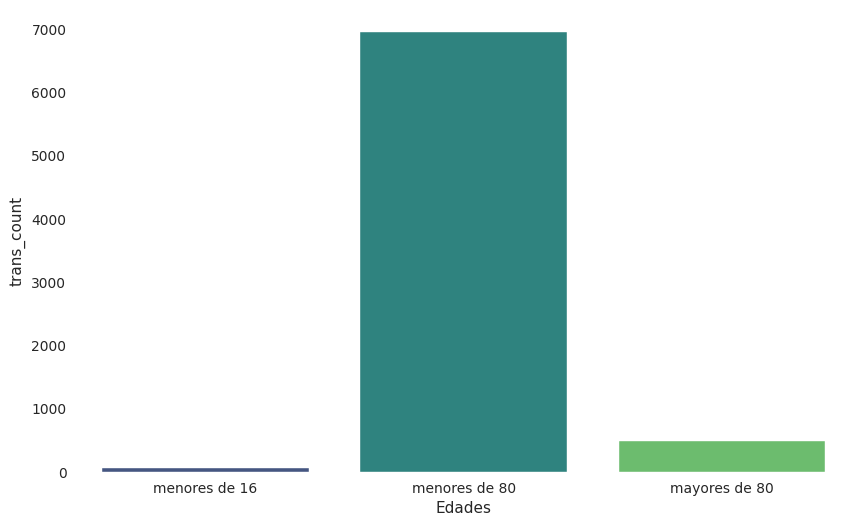

In [74]:
#Creamos  categorías de edad temporales para visulizar mejor.
temp_transacciones = age_fraude_cc.copy()
transacciones_fraude['age_group'] = pd.cut(transacciones_fraude['age'],
                                           bins=[0, 16, 80, float('inf')],
                                           labels=['menores de 16', 'menores de 80', 'mayores de 80'])
# Verificamos que las categorías se asignaron correctamente.
print(transacciones_fraude[['age', 'age_group']].head())
# Contamos transacciones fraudulentas por grupo de edad.
conteo_por_edad = transacciones_fraude['age_group'].value_counts().reset_index()
conteo_por_edad.columns = ['age_group', 'trans_count']

# Creamos gráfico de barras para las transacciones por grupo de edad.
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_por_edad, x='age_group', y='trans_count', palette='viridis')
plt.xlabel('Edades')


Podríamos optar por eliminar edades menores a 16 años y mayores de 80 porque no nos significan en cantidad un aporte importante, pero sí lo es por ej. el emisor de esa tarjeta, la ciudad a la cual pertenece y demás metadatos, por tal motivo decidimos **no eliminarlos**.

**PREGUNTA**:Tiene relaciòn la cantidad poblaciòn de las ciudades con los titulares de tarjetas fraudulentas?

**Transacciones fraude** vs **Población**

In [75]:
# Verificamos los datos únicos en la columna city_pop en transacciones fraude.
print(transacciones_fraude['city_pop'] .unique())

[    885 1595797    1472     145     602   11253   21635     976    1228
  276002     355    1643    2518    5507    2202     277  270712  973849
    3285      73    4729  238602     205    1892    4653      46    1979
    2408   24840  136895    5950     475   31394     344   50835     149
     126    1943   22305 1241364     540 2906700    2749    2368  601723
     922    2060   99475   75903     399    1946      77   10150  248858
     686    4895     254     581     795   16955   52126     198     964
  151022    4299  166081     110  186140   12626     272  198659    1420
  641349    3776    4138     923     397    1213      53  134056    5577
   14783    2916   27020  116155    3764    1089     878      47    1075
    4431     121   67100     568  190178   36784    2691    7297     365
 1526206    1645    3862  673342     520  927396  172247  545147    2661
     302     522   27829    1368     513    1271     140     470   35439
   19880  910148  478404   10085      83  107941   

**RTA**: Se observa una gran variedad de cantidad de habitantes. Desde números de dos dígitos hasta población de millones, pero...

**PREGUNTA**: En qué poblaciones hay mayor probabilidad que se den los fraudes en poblaciones **grandes? medianas? pequeñas?**





Text(0.5, 1.0, 'Poblaciòn de ciudades')

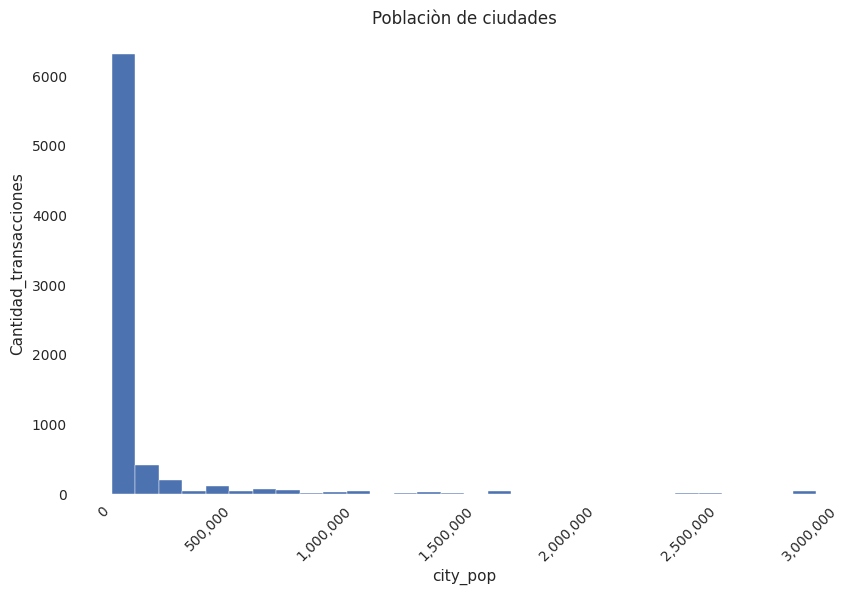

In [76]:
#Analizamos con histograma la variable cantidad población de las ciudades.
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['city_pop'], bins=30)
# Configurar etiquetas del eje x para mostrar solo números enteros
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('city_pop')
plt.ylabel('Cantidad_transacciones')
plt.title('Poblaciòn de ciudades')


Observamos que **no** **necesariamente** en poblaciones más grandes se efectúan mayores transacciones . Encontramos que en una población pequeña se efectuaron muchas mas transacciones fraudulentas de las que se producen en una ciudad con poblacion mayor.

**RTA**: La mayorìa de las transacciones fraudulentas se efectùan en ciudades pequeñas.-

     city_pop  trans_count
0     2906700           39
1      276002           29
2      190178           29
3         302           29
4      413574           27
..        ...          ...
686    105638            3
687   1312922            2
688     24536            2
689     59744            2
690     71335            2

[691 rows x 2 columns]


Text(0.5, 1.0, 'Transacciones Fraudulentas por Población ')

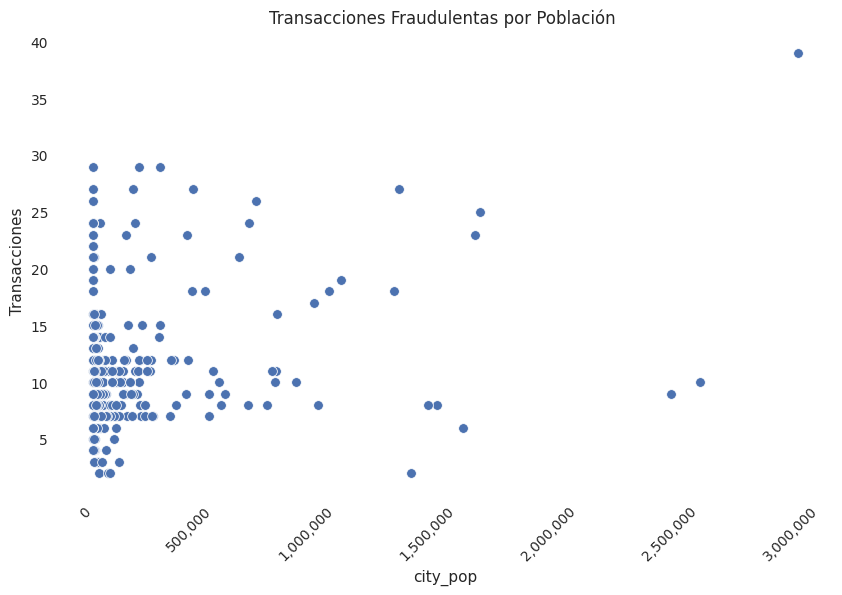

In [77]:
# Crear el gráfico de dispersión
transacciones_temp = transacciones_fraude['city_pop'].value_counts().reset_index()
transacciones_temp.columns = ['city_pop', 'trans_count']
print(transacciones_temp)


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transacciones_temp, x='city_pop', y='trans_count')
# Configurar etiquetas del eje x para mostrar solo números enteros
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('city_pop')
plt.ylabel(' Transacciones')
plt.title('Transacciones Fraudulentas por Población ')


Text(0.5, 1.0, ' Población < 100k habitantes')

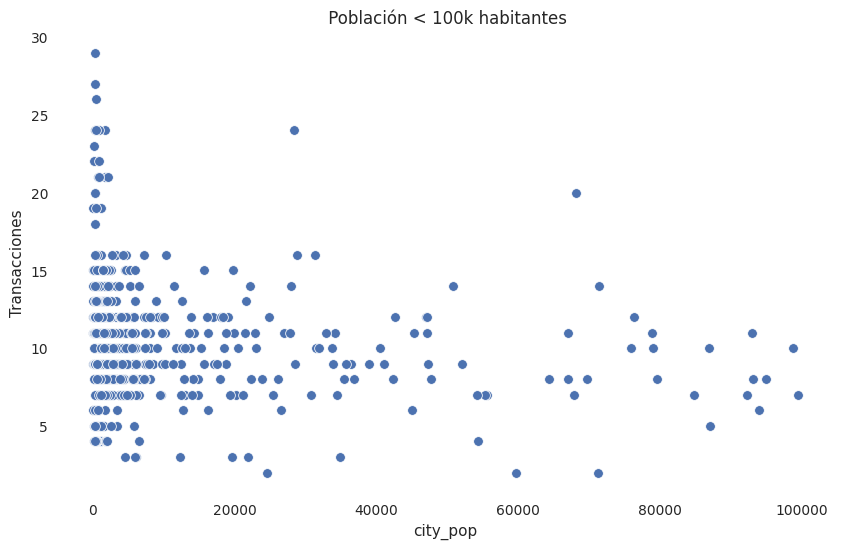

In [78]:
#Filtramossolo poblaciones menores a 100.000 habitantes.
transacciones_temp = transacciones_temp[transacciones_temp['city_pop'] < 100000]
#Creamos el gráfico de dispersión.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transacciones_temp, x='city_pop', y='trans_count')
plt.xlabel('city_pop')
plt.ylabel('Transacciones')
plt.title(' Población < 100k habitantes')


Ciudades **más** pequeñas, **más** transacciones.

**PREGUNTA**: Se realizan màs transacciones fraudulentas durante los horarios **AM** o **PM**?

In [79]:
# Contamos las transacciones por AM/PM.
conteo_am_pm = transacciones_fraude['AM_PM'].value_counts().reset_index()
conteo_am_pm.columns = ['AM_PM', 'count']
print(conteo_am_pm)






  AM_PM  count
0    PM   4599
1    AM   2907


**RTA**: Se efectùan màs transacciones en horarios **PM**.

Text(0.5, 1.0, ' Horario de Transacciones Fraudulentas ')

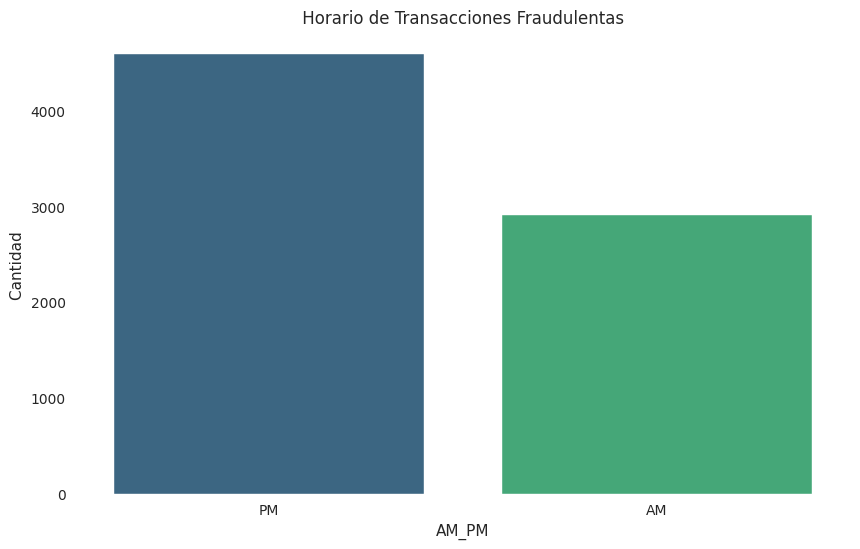

In [80]:
# Creamos el gráfico de barras para mejor visualizaciòn.
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_am_pm, x='AM_PM', y='count', palette='viridis')
plt.ylabel('Cantidad ')
plt.title(' Horario de Transacciones Fraudulentas ')

Text(0.5, 1.0, 'Porcentajes Transacciones Fraudulentas  AM/PM')

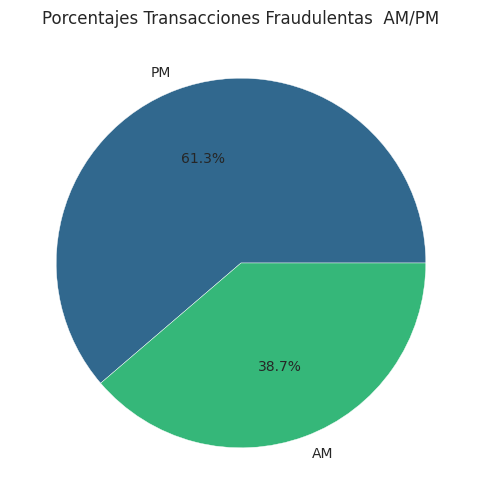

In [81]:
# Creamos el gráfico de pie para obtener representados porcentajes AM/PM.
plt.figure(figsize=(10, 6))
plt.pie(conteo_am_pm['count'], labels=conteo_am_pm['AM_PM'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(conteo_am_pm)))
plt.title('Porcentajes Transacciones Fraudulentas  AM/PM')


La representaciòn en gràficos de los **porcentajes** 61.3% **PM** / 38.7% **AM**.

**Otros** dataframes para analizar **otros** aspectos.

 **Tarjeta** vs **Categoría**.

In [82]:
#Agrupamos por nro. tarjeta, categorías y contamos las transcacciones.
transacciones_fraude_categoria = transacciones_fraude.groupby(['cc_num','category'])
transacciones_fraude_categoria['trans_num'].count()




cc_num               category     
60416207185          entertainment    1
                     food_dining      1
                     gas_transport    2
                     home             1
                     kids_pets        1
                                     ..
4980323467523543940  shopping_net     2
                     shopping_pos     2
4992346398065154184  grocery_pos      2
                     shopping_net     4
                     shopping_pos     2
Name: trans_num, Length: 4121, dtype: int64

Podemos inferir que realivamente **varía** de  **categoría** una misma  tarjeta fraudulenta. Es decir que una misma tarjeta efectúa transacciones con **diferentes categorías**.-

**PREGUNTA**:También varían los "merchant" por tarjeta fraudulenta?

**Tarjeta** vs **Comerciante**


In [83]:
#Agrupamos por nro.tarjeta, comerciante y contamos transacciones.
transacciones_fraude_merchant = transacciones_fraude.groupby(['cc_num','merchant'])
transacciones_fraude_merchant['trans_num'].count()

cc_num               merchant                           
60416207185          fraud_Barrows PLC                      1
                     fraud_Berge-Hills                      1
                     fraud_Cummings LLC                     1
                     fraud_Douglas-White                    1
                     fraud_Labadie LLC                      1
                                                           ..
4992346398065154184  fraud_Kerluke-Abshire                  1
                     fraud_Kihn, Abernathy and Douglas      1
                     fraud_Kris-Padberg                     1
                     fraud_Rutherford-Mertz                 1
                     fraud_Schmeler, Bashirian and Price    1
Name: trans_num, Length: 7391, dtype: int64

**RTA.**:En esta muestra se verifican transacciones  con **diferentes** **merchants** por  cada tarjeta fraudulenta.

 Pero**...**

**PREGUNTA**: Cuántas veces estafan a **un mismo** merchant con distintas tarjetas?

**Comerciante** vs **Transacciones Fraude**

In [84]:
#Vamos a determinar más profundamente otras relaciones entre transacciones y merchant.
#Agrupamos y contamos las transacciones por merchant.
merchant_transacciones = transacciones_fraude.groupby('merchant')['trans_num'].count()
#Ordenamos en forma descendente.
merchant_transacciones_ordenadas = merchant_transacciones.sort_values(ascending=False)
print(merchant_transacciones_ordenadas)

merchant
fraud_Rau and Sons                   49
fraud_Kozey-Boehm                    48
fraud_Cormier LLC                    48
fraud_Doyle Ltd                      47
fraud_Vandervort-Funk                47
                                     ..
fraud_Dicki Ltd                       1
fraud_Kuphal-Toy                      1
fraud_Deckow-Dare                     1
fraud_Dach-Borer                      1
fraud_Reichel, Bradtke and Blanda     1
Name: trans_num, Length: 679, dtype: int64


**RTA**.:Observamos  comerciantes con gran cantidad de  transacciones fraudulentas....

**PREGUNTA**:son engañados realmente tantas veces?  están involucrados en el mecanismo fraudulento?

**UNICA SIN RTA**:Es la única pregunta que no podemos responder atento a que el acto probatorio de un delito no nos corresponde, pero sí podemos marcar alertas en estos casos tan llamativos.-


<Axes: xlabel='trans_num', ylabel='Count'>

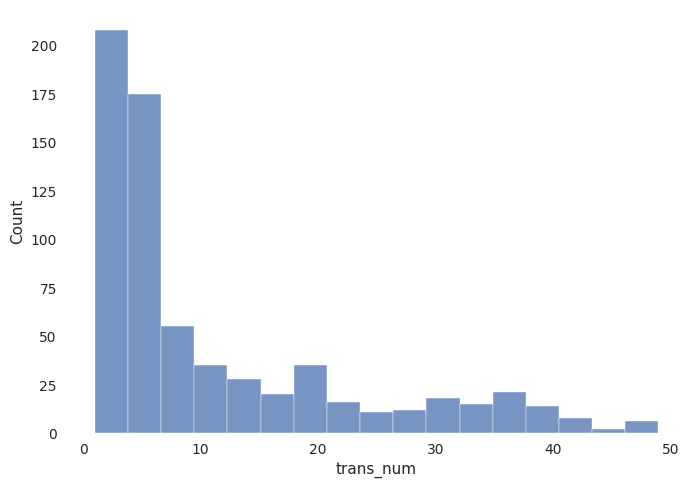

In [85]:
#Analizamos con un histograma.
sns.histplot(merchant_transacciones_ordenadas)

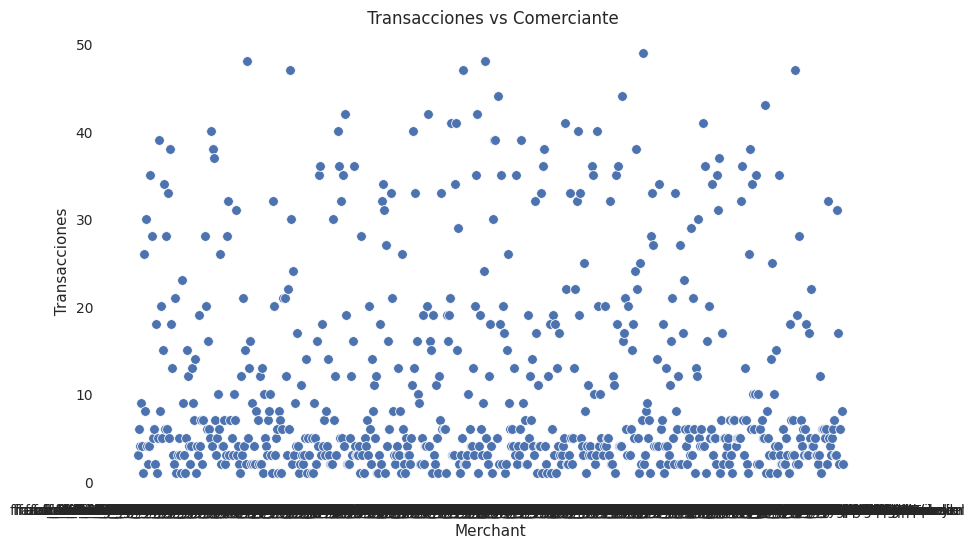

In [86]:
#Pasamos a dataframe para graficar con scatter.
if isinstance(merchant_transacciones, pd.Series):
    merchant_transacciones = merchant_transacciones.to_frame()
#Creamos el gráfico.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merchant_transacciones, x='merchant', y='trans_num')
plt.xlabel('Merchant')
plt.ylabel(' Transacciones')
plt.title(' Transacciones vs Comerciante')
plt.show()

Finalmente ambos gráficos  (histograma y dispersión) nos muestran una alta concentración en comerciantes con **menos** de 10 **transacciones fraude** y en menor porporción aquellos comerciantes con altas cantidades de transacciones fraude, pero **si sumamos** a todos lo comerciantes con **altas cantidades de fraudes** (> a 10), nos da un número bastante significativo para tener en cuenta a todos ellos al momento de la predicción.

**Tarjetas** vs **Género**

In [87]:
#Agrupamos por nro tarjeta, por gender, cantidad de transacciones .
transacciones_fraude_gender=transacciones_fraude.groupby(['cc_num',"gender"]) ['trans_num'].count().unstack(fill_value=0)
transacciones_fraude_gender

gender,F,M
cc_num,,
60416207185,9,0
60422928733,0,12
60423098130,0,10
60427851591,0,14
60490596305,10,0
...,...,...
4911818930706644725,0,9
4956828990005111019,0,10
4973530368125489546,10,0


In [88]:
# Sumamos las columnas 'F' y 'M'
total_fraude_gender= transacciones_fraude_gender.sum()
print(total_fraude_gender)

gender
F    3735
M    3771
dtype: int64


**No hay** predominio de ningún **género** en cuanto a cantidad de transacciones fraudulentas.-


**Transacciones Fraude** vs **City**

In [89]:
#Contamos cuántas cities hay con transacciones fraudulentas.
transacciones_fraude['city'].nunique()

702

Tenemos **702 ciudades** con transacciones fraude.

In [90]:
#Agrupamos por nro.de tarjeta y ciudad. Realizamos conteo por agrupamiento.
conteo_fraude_city= transacciones_fraude.groupby(['cc_num','city']).size().reset_index(name='count')
print(conteo_fraude_city)

                  cc_num             city  count
0            60416207185    Fort Washakie      9
1            60422928733    North Augusta     12
2            60423098130          Amorita     10
3            60427851591       Burns Flat     14
4            60490596305           Haynes     10
..                   ...              ...    ...
757  4911818930706644725             Mesa      9
758  4956828990005111019        Elizabeth     10
759  4973530368125489546          Winslow     10
760  4980323467523543940  North Haverhill     10
761  4992346398065154184          Mc Nabb      8

[762 rows x 3 columns]


In [91]:
# Calculamos el promedio de transacciones fraudulentas por tarjeta por ciudad.
promedio_fraude_city = conteo_fraude_city['count'].mean()
promedio_fraude_city

9.850393700787402

Se realizan casi **10** transacciones **por city** fraudulentas perjudicando a 10 merchants (diferentes o no) tan solo en un día, máximo  dos días.

## DATASET 2DO. PROCESAMIENTO. "**transacciones_long**"

In [92]:
# Extraemos el nombre del día y creamos una nueva columna "day_name".
transacciones_long['day_name'] = transacciones_long['trans_date_trans_time'].dt.day_name()
print(transacciones_long['day_name'])

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_name, Length: 1296675, dtype: object


**Transacciones Fraude**  vs **Days**

In [93]:
# Creamos una columna 'day_name' con el nombre del día.
transacciones_fraude['day_name'] = transacciones_fraude['trans_date_trans_time'].dt.day_name()


In [94]:
#Veremos los días en donde se producen mayor cantidad de transacciones fraudulentas.
conteo_fraude_day= transacciones_fraude.groupby('day_name').size().reset_index(name='days_count')
conteo_fraude_day=conteo_fraude_day.sort_values(by='days_count', ascending=False)
print(conteo_fraude_day)

    day_name  days_count
2   Saturday        1227
3     Sunday        1216
1     Monday        1182
0     Friday        1079
4   Thursday        1008
5    Tuesday         935
6  Wednesday         859


Vamos a trabajar sobre los números de las tarjetas para tratar de identificar **emisores**.

In [95]:
#Observamos las tarjetas 'unicas de las transacciones totales.
transacciones_long['cc_num']

,cc_num
0,2703186189652095
1,630423337322
2,38859492057661
3,3534093764340240
4,375534208663984
...,...
1296670,30263540414123
1296671,6011149206456997
1296672,3514865930894695
1296673,2720012583106919


In [96]:
# Creamos columna "INN" y extraemos los primeros seis dígitos (IIN)  para tener identificados diferentes emisores.
transacciones_long['IIN'] = transacciones_long['cc_num'].astype(str).str[:6].astype(int)
print(transacciones_long['IIN'])

0          270318
1          630423
2          388594
3          353409
4          375534
            ...  
1296670    302635
1296671    601114
1296672    351486
1296673    272001
1296674    429290
Name: IIN, Length: 1296675, dtype: int64


In [97]:
# Hacemos merge con columna  'trans_num'para poder incluir en transacciones_fraude la columna IIN recién incorporada.
transacciones_fraude = transacciones_fraude.merge(transacciones_long[['trans_num', 'IIN']], on='trans_num', how='left')
transacciones_fraude.columns



Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'is_fraud', 'trans_date', 'AM_PM', 'age',
       'age_group', 'day_name', 'IIN'],
      dtype='object')

In [98]:
#Contamos los INN (emisores)únicos.
transacciones_fraude['IIN'].nunique()

748

 **Transacciones Fraude** vs **Emisores**

In [99]:
#Contamos transacciones fraudes agrupadas por IIN (emisor).
conteo_fraude_por_IIN = transacciones_fraude.groupby('IIN')['trans_num'].count().reset_index()
# Renombramos la columna
conteo_fraude_por_IIN = conteo_fraude_por_IIN.rename(columns={'trans_num': 'conteo_transacciones_fraude'})
# Ordenamos en forma descendente
conteo_fraude_por_IIN = conteo_fraude_por_IIN.sort_values(by='conteo_transacciones_fraude', ascending=False)
print(conteo_fraude_por_IIN)



        IIN  conteo_transacciones_fraude
197  352959                           28
659  601138                           27
43   213186                           24
658  601136                           23
169  350604                           23
..      ...                          ...
278  357643                            2
488  450310                            2
651  601110                            2
358  400567                            2
374  408909                            2

[748 rows x 2 columns]


El **emisor** de tarjetas fraude que registró  mayor cantidad de transacciones contabilizó unas 28.-

**Transacciones** vs **Emisores** vs **Transacciones Fraude**

In [100]:
# Agrupamos por 'IIN' y 'cc_num' y contamos las transacciones.
conteo_transacciones_IIN_cc = transacciones_fraude.groupby(['IIN', 'cc_num']).size().reset_index(name='conteo_transacciones')
# Ordenamos de forma descendente por el conteo de transacciones.
conteo_transacciones_IIN_cc = conteo_transacciones_IIN_cc.sort_values(by='conteo_transacciones', ascending=False)
print(conteo_transacciones_IIN_cc)

        IIN               cc_num  conteo_transacciones
513  459356        4593569795412                    19
191  352055     3520550088202337                    19
430  426012        4260128500325                    18
187  351866     3518669219150142                    16
465  440001  4400011257587661852                    16
..      ...                  ...                   ...
383  408909  4089096483689733451                     2
497  450310  4503101193493052864                     2
660  601110     6011109736646996                     2
367  400567     4005676619255478                     2
287  357643     3576431665303017                     2

[762 rows x 3 columns]


Podemos determinar claramente **cuáles** son los  **emisores** con mayor cantidad de emisión de tarjetas con las que efectuarán **fraudes**.-


In [101]:
#Usaremos librerías para geolocalización de transacciones.
import geopandas as gpd
import plotly.express as px

In [102]:
#Graficamos latitud/longitud.
fig = px.scatter_mapbox(transacciones_fraude, lat="lat", lon="long", zoom=9, height=600)
fig.update_layout(mapbox_style="carto-positron")

In [103]:
#Importamos otra librería para darle mas color a la información.
import plotly.express as px

In [104]:
# Creamos una nueva columna 'density' en función de  la cantidad de transacciones por ciudad.
transacciones_fraude['density'] = transacciones_fraude.groupby(['lat', 'long'])['trans_num'].transform('count')


In [105]:
# Creamos el gráfico con tamaño por densidad y colores por densidad.
figura_color = px.scatter_mapbox(transacciones_fraude,
                        lat="lat",
                        lon="long",
                        size='density',
                        color='density',
                        zoom=9,
                        height=600)

figura_color.update_layout(mapbox_style="carto-positron")
figura_color.show()


## DATASET 3ER. PROCESAMIENTO (REDUCIDO PARA GITHUB). "**transacciones_short**"

Vamos a trabajar con un dataset reducido en forma REPRESENTATIVA, en primer término para poder hostearlo en Github, en segundo término, porque son en proporción, muy pocas las transacciones fraudulentas comparadas con las **NO FRAUDE**, en función de ello decidimos tomar muestras proporcionales en cada estado hasta equiparar con una cantidad **semejante** a las **SI FRAUDE.**

In [106]:
#Volvemos a filtramos las filas donde is_fraud == 1 (por si hubo cambios).
transacciones_fraude = transacciones_long[transacciones_long['is_fraud'] == 1]

In [107]:
# Filtramos las filas donde is_fraud == 0 para ir armando muestra reducida
transacciones_no_fraude = transacciones_long[transacciones_long['is_fraud'] == 0]

In [108]:
# Limitamos el número de filas no fraudulentas a 8000
max_no_fraudulentas = 8000

In [109]:
#Corroboramos la cantidad de filas fraudulentas, todas formarán parte del nuevo dataset.
num_transacciones_fraude = len(transacciones_fraude)
print("Número de transacciones fraudulentas:", num_transacciones_fraude)

Número de transacciones fraudulentas: 7506


In [110]:
# Creamos un dataframe vacío para almacenar las transacciones  no fraudulentas
muestra_transacciones_no_fraudulentas= pd.DataFrame()


In [111]:
# Calculamos el número de transacciones por estado para que no superen las 8000.
num_states = transacciones_no_fraude['state'].nunique()
muestra_por_estado = max_no_fraudulentas // num_states

In [112]:
#Corroboramos el nro de states únicos de transacciones fraudulentas.
count_states_unicos_fraude=transacciones_fraude["state"].unique()
print(f"El número de estados únicos es: {count_states_unicos_fraude}")

El número de estados únicos es: ['NC' 'TX' 'PA' 'AK' 'MO' 'AR' 'OH' 'VA' 'NY' 'FL' 'SD' 'ME' 'NE' 'AL'
 'CA' 'TN' 'IN' 'IA' 'UT' 'SC' 'MI' 'ND' 'KY' 'WI' 'IL' 'OK' 'DC' 'MN'
 'LA' 'OR' 'WY' 'NM' 'GA' 'KS' 'WV' 'MD' 'NH' 'AZ' 'WA' 'CO' 'NJ' 'MA'
 'DE' 'ID' 'MS' 'CT' 'MT' 'VT' 'NV' 'RI' 'HI']


Advertimos que la **diferencia** entre **States únicos** (51) totales (del dataset long/original) y States únicos **Si Fraudes**,  es cero. Es decir los states únicos han sufrido al menos **una vez** transacciones fraudulentas.-

In [113]:
# Iteraramos sobre cada state y tomamos una muestra aleatoria de filas no fraudulentas.
for state in transacciones_no_fraude['state'].unique():
    estado_transacciones_no_fraude = transacciones_no_fraude[transacciones_no_fraude['state'] == state]
    muestra_estado_transacciones_no_fraude = estado_transacciones_no_fraude.sample(n=min(muestra_por_estado,len(estado_transacciones_no_fraude)), random_state=42)
    muestra_transacciones_no_fraudulentas = pd.concat([muestra_transacciones_no_fraudulentas,  muestra_estado_transacciones_no_fraude])

In [114]:
#Controlamos que las rows no superen las 8000.
if len(muestra_transacciones_no_fraudulentas ) >max_no_fraudulentas:
    muestra_transacciones_no_fraudulentas = muestra_transacciones_no_fraudulentas.sample(n=max_no_fraudulentas, random_state=42)

In [115]:
# Combinamos ambos subconjuntos.
transacciones_short = pd.concat([transacciones_fraude,  muestra_transacciones_no_fraudulentas])
print(transacciones_short.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15506 entries, 2449 to 920853
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  15506 non-null  datetime64[ns]
 1   cc_num                 15506 non-null  int64         
 2   merchant               15506 non-null  object        
 3   category               15506 non-null  object        
 4   amt                    15506 non-null  float64       
 5   gender                 15506 non-null  object        
 6   city                   15506 non-null  object        
 7   state                  15506 non-null  object        
 8   zip                    15506 non-null  int64         
 9   lat                    15506 non-null  float64       
 10  long                   15506 non-null  float64       
 11  city_pop               15506 non-null  int64         
 12  job                    15506 non-null  object        
 13  do

In [116]:
transacciones_short.shape

(15506, 21)

Este es nuestro **nuevo dataset** que formatearemos como csv listo para subir a Github por si fuera requerido.Además es el dataset al cual le aplicaremos el **modelo** de predicción.

In [117]:
transacciones_short.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,city_pop,job,dob,trans_num,is_fraud,trans_date,AM_PM,age,day_name,IIN
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,2019-01-02,AM,30,Wednesday,461331
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,2019-01-02,AM,58,Wednesday,340187
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,2019-01-02,AM,58,Wednesday,340187


Probamos el paso del dataframe a **csv**, de csv a Github y de Github a Colab.

In [118]:
transacciones_short=pd.DataFrame(transacciones_short)
transacciones_short.to_csv('transacciones_short.csv', index=False)

In [119]:
#Vemos que el traspaso de github a colab es correcto. Empezaremos a trabajar este dataset para los modelos.
df=pd.read_csv('https://raw.githubusercontent.com/Gimena2024/transacciones_short/refs/heads/main/transacciones_short.csv')
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,city_pop,job,dob,trans_num,is_fraud,trans_date,AM_PM,age,day_name,IIN
0,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,2019-01-02,AM,30,Wednesday,461331
1,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,2019-01-02,AM,58,Wednesday,340187
2,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,2019-01-02,AM,58,Wednesday,340187
3,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,28611,35.9946,...,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,2019-01-02,AM,30,Wednesday,461331
4,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,78208,29.4400,...,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,2019-01-02,AM,58,Wednesday,340187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,2019-12-23 21:00:45,4633065159406313,fraud_Bahringer Group,health_fitness,93.56,F,Providence,RI,2908,41.8383,...,203571,"Nurse, children's",1995-11-29,a037b465e4488b12b2e215231a9038bd,0,2019-12-23,PM,24,Monday,463306
15502,2019-02-09 08:23:11,4633065159406313,fraud_Bernhard Inc,gas_transport,43.82,F,Providence,RI,2908,41.8383,...,203571,"Nurse, children's",1995-11-29,5078a3bfd06817875cbf3bdb9195c77e,0,2019-02-09,AM,23,Saturday,463306
15503,2019-05-18 23:00:16,4633065159406313,fraud_Rutherford-Mertz,grocery_pos,70.76,F,Providence,RI,2908,41.8383,...,203571,"Nurse, children's",1995-11-29,4a8cd67cd0ce49d66bdef0960b3f4e52,0,2019-05-18,PM,23,Saturday,463306
15504,2020-05-17 05:12:34,4633065159406313,fraud_Ledner-Pfannerstill,gas_transport,66.99,F,Providence,RI,2908,41.8383,...,203571,"Nurse, children's",1995-11-29,7cd2d1d0e9ab3d81ccfb96f3d046c8ed,0,2020-05-17,AM,24,Sunday,463306


#MODELOS MACHINE LEARNING